# Cubic Spline Interpolation

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
X = np.array([1, 3, 5, 7, 9, 11, 15, 20, 22, 25, 27, 30])
Y = np.array([20, 14, 10, 7, 11, 8, 17, 19, 10, 22, 15, 11])

Example run: interpolate data points

In [11]:
num_points = 1000
N = len(X)
if (N != len(Y)):
    print("Len_X not equal len_Y")
    exit()

H_x = np.diff(X)
H_y = np.diff(Y)
H_n = N - 1

Alfa = 1 / H_x[1: H_n - 1]
Gamma = 1 / H_x[1: H_n - 1]
Beta = 2 * (1 / H_x[:H_n - 1] + 1 / H_x[1:])

dF = H_y / H_x
Delta = 3 * (dF[1:] / H_x[1:] + dF[:H_n - 1] / H_x[:H_n - 1])

TDM = np.diag(Alfa, k=-1) + np.diag(Beta, 0) + np.diag(Gamma, +1)
B = np.linalg.solve(TDM, Delta)
B = np.hstack([0, B, 0])

C = (3 * dF - B[1:] - 2 * B[:H_n]) / H_x
D = (B[:H_n] + B[1:] - 2 * dF) / (H_x ** 2)

x_step = (X[N - 1] - X[0]) / num_points

x_points = []
x_base = X[0]
for i in range(num_points):
    x_points.append(x_base + x_step * i)

y_points = []
for x_point in x_points:
    for i in range(N - 1):
        if ((x_point >= X[i]) and (x_point <= X[i + 1])):
            y_point = Y[i] + B[i] * (x_point - X[i]) + C[i] * ((x_point - X[i]) ** 2) + D[i] * ((x_point - X[i]) ** 3)
            y_points.append(y_point)

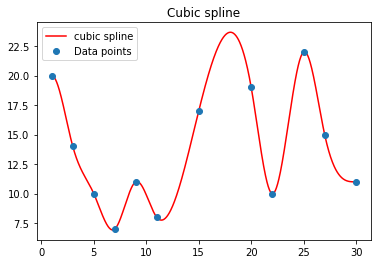

In [12]:
plt.plot(x_points, y_points, "-r",label='cubic spline')
plt.plot( X, Y, "o",label='Data points')
plt.legend()
plt.title('Cubic spline')
plt.show()